<a href="https://colab.research.google.com/github/dilaraozcerit/Deep_Learning/blob/master/DL_S11_(Multivariate_Time_Series_with_RNN_Manually_energydata)_batch24_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from sklearn.preprocessing import RobustScaler
# ^^^ pyforest auto-imports - don't write above this line
___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 11<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Manually)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Recognizing and Understanding Data

In [5]:
df = pd.read_csv('energydata_complete.csv',index_col='date', parse_dates = True)

In [6]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


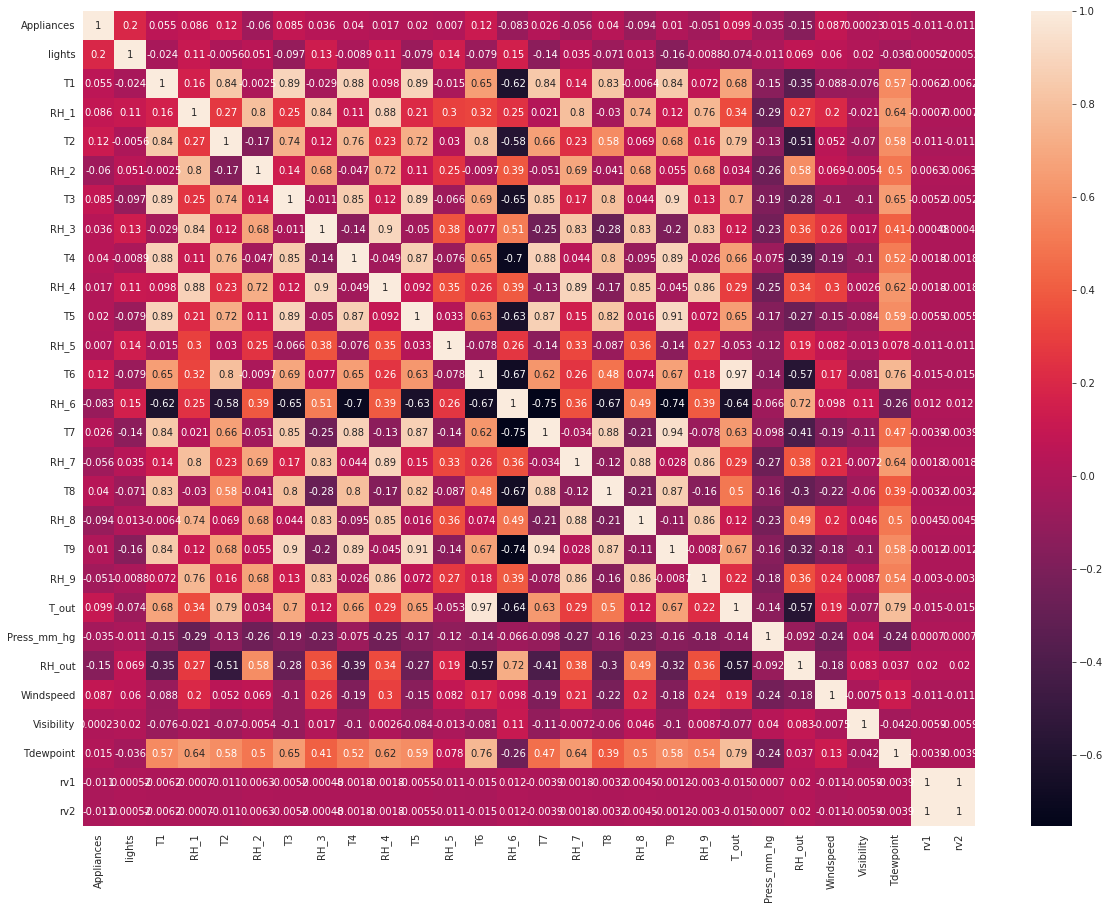

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [10]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [11]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [12]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


  10 dakikalık verileri saatlik hale getirmek istedik. Bunun için de datasetimizi 2'ye böldük önce. Çünkü resample yaparken ayrı aggregation method kullanmamız gerekecek.

In [14]:
df_a = df[["Appliances", "lights"]]    
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [15]:
df_a = df_a.resample("H").sum()
df_b = df_b.resample("H").mean()

In [16]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [17]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [18]:
df = df.round(2)

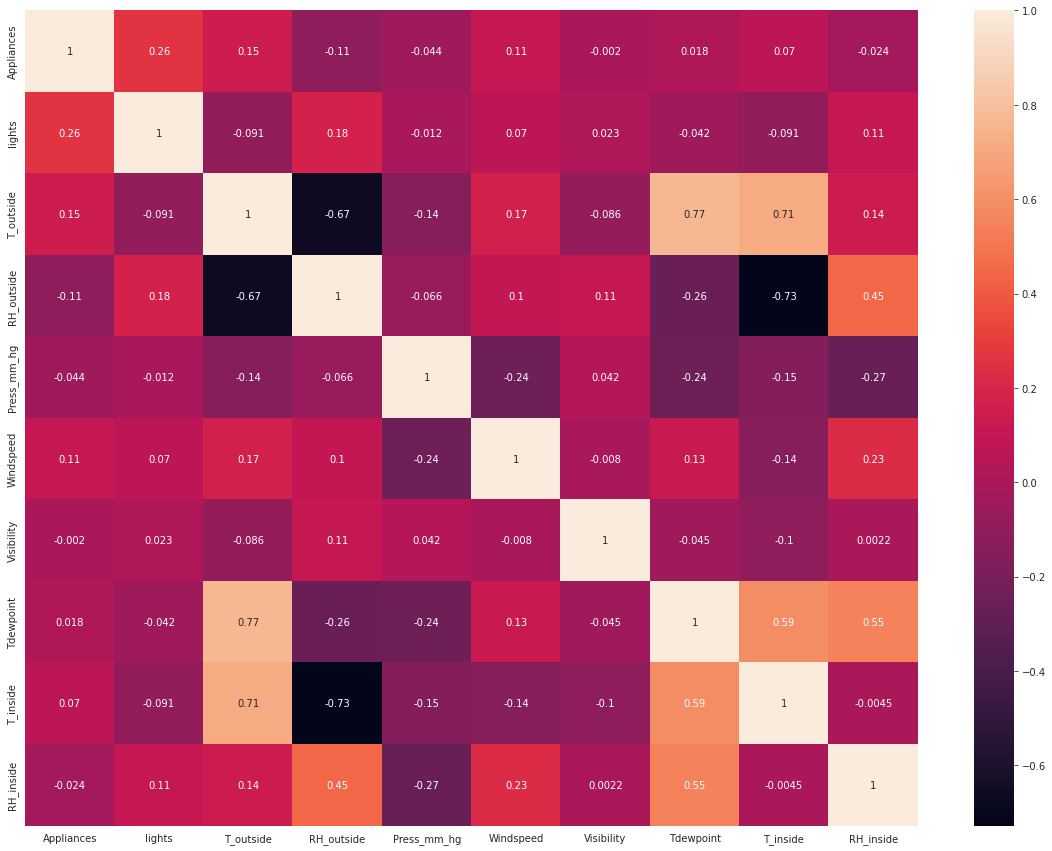

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

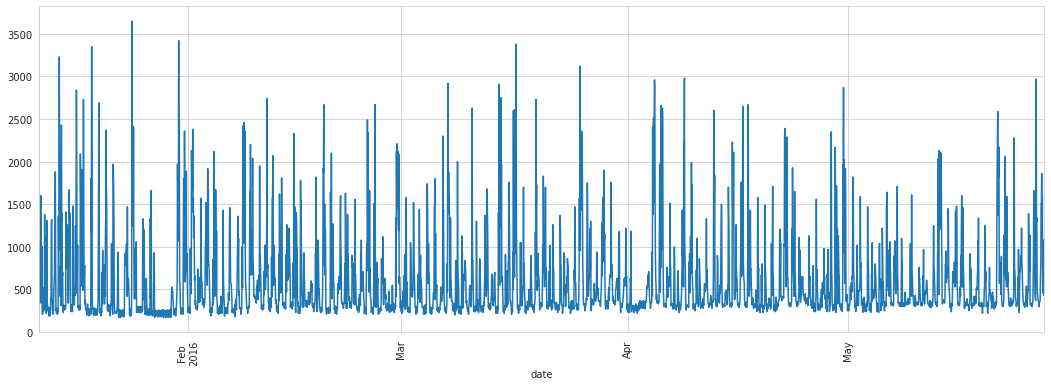

In [20]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

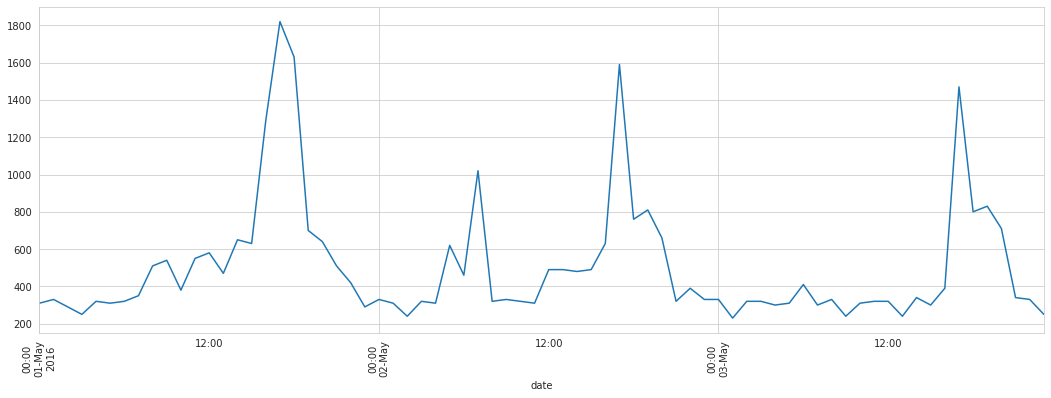

In [21]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

### Train Test Split

In [22]:
len(df)

3290

In [23]:
# How many rows per day?
24  # seqeunce uzunluğumuz 24 olacak.

24

In [24]:
test_days = 7

In [25]:
test_ind = test_days*24

In [26]:
test_ind

168

In [27]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [ ]:
train.shape, test.shape

((3122, 10), (168, 10))

### Scale Data

buraya kadar 10. notebookla aynıydı, işler şimdi değişiyor. Bizim öncekinde tek bir feature'mız vardı ve biz onu minmax scaler'a sokmuştuk. 

**Train'e --> fit_transform**

**Test'e --> transform**

yapmıştık, her zamanki gibi.

Biz inverse_transform sadece target sütunumuza uygulayacağız diğerlerine değil. O yüzden de target'ımızı ayrı scale edeceğiz. Toptan uygularsak bize yanlış dönüş yapar. Inverse_transform yapmaz yani.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
df.columns 

Index(['Appliances', 'lights', 'T_outside', 'RH_outside', 'Press_mm_hg',
       'Windspeed', 'Visibility', 'Tdewpoint', 'T_inside', 'RH_inside'],
      dtype='object')

In [ ]:
f_columns = df.columns[1:]

f_transformer = RobustScaler() # featurelar için bunu
target_transformer = RobustScaler() # target için bunu kullanıyoruz.

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])  # bütun sütunların f_columns ların içindekilere fit_transform uyguladık.
train['Appliances'] = target_transformer.fit_transform(train[['Appliances']])  # burda da Appliances'a uyguluyoruz.

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
test['Appliances'] = target_transformer.transform(test[['Appliances']])
# Datamda appliances'ı yani target'a scale uygulamamam lazım.
# Yani aslında şöyle, ikisini de ayrı ayrı scale etmek lazım.
# notebook'un ilersinde sadece appliances'ı inverse trnasform yapacağız bunun için de ayrı ayrı scale ediyoruz.

### Define a Function for Creating Time Steps 

Daha önceki datalarımızda predictionları time series generator'a yaptırmıştık. O bize otomatik olarak yapmıştı. Burda kendimiz manuel yapacağız.

In [ ]:
def create_dataset(X, y, time_steps=1):  
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 24
# lengthin fazla olması unutkanlığa sebep olur. çok kısa da olmayacak çok uzun da olmayacak. 100'lere çıkılması çok tavsiye edilmez.
# Genel olarak lengtin uzunluğu artarsa performans düşer.
# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Appliances, time_steps)
X_test, y_test = create_dataset(test, test.Appliances, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3098, 24, 10) (3098,)
(144, 24, 10) (144,)


3098 tane 24 satıra 10'luk array'im var elimde.

In [ ]:
y_test

array([ 0.77777778,  0.55555556,  1.22222222,  0.19444444,  1.44444444,
       -0.02777778, -0.08333333, -0.16666667, -0.13888889, -0.11111111,
       -0.19444444, -0.05555556,  0.02777778,  2.13888889,  0.86111111,
        2.33333333,  4.69444444,  1.08333333,  0.69444444,  0.75      ,
        0.58333333,  0.44444444,  3.38888889,  0.97222222,  0.58333333,
        0.91666667,  0.44444444,  0.27777778, -0.02777778, -0.05555556,
       -0.16666667, -0.05555556, -0.16666667, -0.19444444,  0.08333333,
       -0.02777778, -0.08333333, -0.16666667, -0.11111111, -0.16666667,
       -0.08333333,  0.        , -0.08333333, -0.05555556,  0.19444444,
        1.58333333,  5.30555556,  1.02777778,  0.97222222,  0.72222222,
        0.11111111,  0.02777778, -0.05555556, -0.19444444, -0.08333333,
       -0.11111111, -0.13888889, -0.13888889,  0.75      ,  0.16666667,
        1.66666667, -0.08333333, -0.38888889,  0.08333333,  0.66666667,
        1.11111111,  0.94444444,  1.47222222,  1.33333333,  1.33

## Model Building with LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features = X_train.shape[2]

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))
# bizden suan 24'e 10'luk veri bekleyecek.

#model.add(Dropout(rate=0.2))
# Dropuout da kullanabiliriz, başka nöronlar da ekleyebiliriz.

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')
# önceden direkt rnn, lstm veya dense diyerek başlıyorduk ama şimdi farklı. 
# Önce bidirectional koyduk başına. 
# Benim 24'lük serilerimi ilk başta 1'den 24'e kadar al sonra da 24'den geriye doğru, 1'e doğru al.
# Ve bu ikisinin toplamlarını bir sonraki katmana aktar.
# Bidirectional bunu yapıyordu işte.
# Her bir nöron 2'sinin sonuçlarının ortalamasını veya toplamlarını döndürecek bir sonrakine.
# Hem düz hem ters alarak her feature için ağırlıklar oluşturacak ve bu ağırlıklarla bir sonrakine gidecek veri.

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

# early stop patience=5 deyince sondan 5. en iyi değerde model duruyor.
# ama eğer restore_best_weights dersek sonuncusunu beklemiyor.
# Bu her zaman böyle True olarak kalabilir sıkıntı yok.

In [ ]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=24,   # batch_size normalde hep 1 vermiştik ama bu sefer 24 verdik çünkü verimiz fazla.
          validation_split=0.3,
#          shuffle=False,
          callbacks=[early_stop])

# Burda default shuffle=True normalde. 
# Shuffle=True ne demek? --> Her epoch'da bir datamın karılması 
# Ama burada datamız zaten 24'lük paketler içinde olduğu için karılmasının bir önemi yok. 
# Bu paketlemeyi yapana kadar datamızın sırası önemli ama paketledikten sonra shuffle=True demenin bir sıkıntısı yok.

Epoch 1/30
91/91 [==============================] - 9s 15ms/step - loss: 1.4987 - val_loss: 0.9336
Epoch 2/30
91/91 [==============================] - 1s 8ms/step - loss: 1.1969 - val_loss: 0.9755
Epoch 3/30
91/91 [==============================] - 1s 8ms/step - loss: 1.1488 - val_loss: 0.8974
Epoch 4/30
91/91 [==============================] - 1s 8ms/step - loss: 1.1035 - val_loss: 0.8575
Epoch 5/30
91/91 [==============================] - 1s 9ms/step - loss: 1.0619 - val_loss: 0.9887
Epoch 6/30
91/91 [==============================] - 1s 10ms/step - loss: 1.0413 - val_loss: 0.9044
Epoch 7/30
91/91 [==============================] - 1s 9ms/step - loss: 1.0023 - val_loss: 0.9500
Epoch 8/30
91/91 [==============================] - 1s 13ms/step - loss: 0.9767 - val_loss: 0.8348
Epoch 9/30
91/91 [==============================] - 1s 12ms/step - loss: 0.9586 - val_loss: 0.8985
Epoch 10/30
91/91 [==============================] - 1s 9ms/step - loss: 0.8882 - val_loss: 0.8873
Epoch 11/30
91/

Biz böyle eğitim yaparken datamızın sırası karışmıyor. Datamız olduğu gibi kalıyor. Modeli oluşturmakla ileriye doğru forecast yapmak farklı şeyler. Onları birbirine karıştırmayalım.

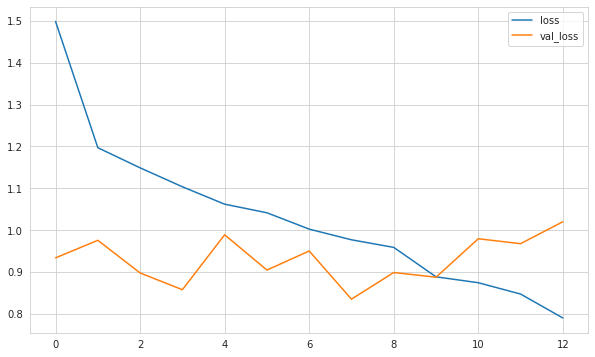

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # regression metriclerimzi

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be used for next prediction¶

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

r2_score: 0.1373125105607258 
mae: 0.7570646557019862 
mse: 1.5052899391155052 
rmse: 1.2269025793091746


### Inverse Transformation and Compare

Neden ayrı ayrı scale yaptığımızın cevabı burada.

In [ ]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1)) # -1 sen ayarla demek
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

# burda reshape yapmamızın sebebi: bizden satır şeklinde array bekliyor
# ama aşağıda tekrardan reshape yaptık ki dik hale getirebilelim bunu. yani inverse yapılmış halini eski haline getirmiş olduk.

In [ ]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
date,,
2016-05-21 19:00:00,650.000,836.454
2016-05-21 20:00:00,570.000,599.276
2016-05-21 21:00:00,810.000,412.180
2016-05-21 22:00:00,440.000,366.494
2016-05-21 23:00:00,890.000,268.924
...,...,...
2016-05-27 14:00:00,610.000,892.688
2016-05-27 15:00:00,460.000,801.884
2016-05-27 16:00:00,810.000,619.311


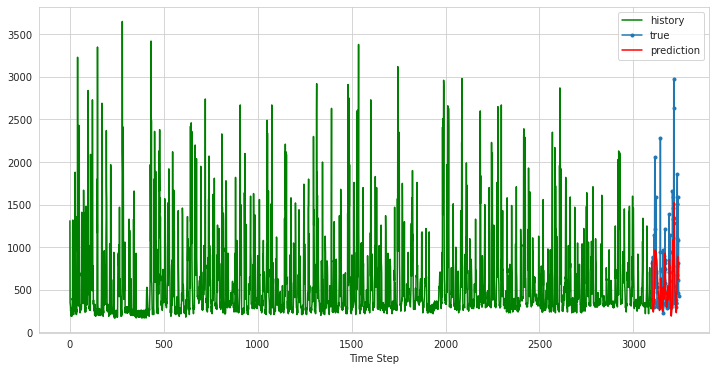

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
#lt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

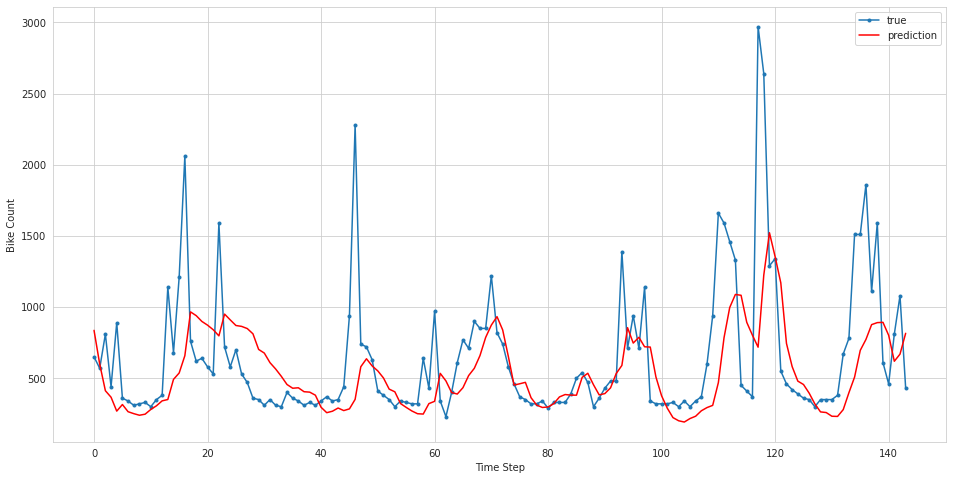

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
# plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();



### Second way : after each prediction, result will be used for next prediction

In [28]:
test # bu sefer eğitimimize predictionlarımızı da dahil ediyoruz
# ama yaptığımız predictionların yanına da 9 tane feature olması lazım ki bize prediction versin.
# Bu yapıyı oluşturmak için test datamızın son 24'ünü alıyoruz ama target labelımız hariç!

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-05-20 19:00:00,390,0,20.080,1.390,758.040,4.580,40.000,9.260,23.440,45.860
2016-05-20 20:00:00,420,0,16.120,10.870,758.100,3.170,40.000,9.120,23.290,44.830
2016-05-20 21:00:00,390,10,14.000,26.340,758.180,1.580,40.000,10.330,23.180,44.700
2016-05-20 22:00:00,320,10,13.100,34.750,758.300,1.000,40.000,10.840,23.140,45.040
2016-05-20 23:00:00,270,0,13.220,42.260,758.170,1.420,35.420,11.610,23.090,45.380
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,610,10,25.570,1.000,755.800,2.000,21.580,13.480,24.850,45.890
2016-05-27 15:00:00,460,0,26.280,1.000,755.670,2.000,21.830,13.260,24.840,45.420
2016-05-27 16:00:00,810,0,26.140,1.000,755.380,2.420,22.580,13.280,24.890,45.990


In [ ]:
df_fake = test.iloc[:time_steps,1:]
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-20 19:00:00,0.000,1.852,-1.082,0.196,0.279,0.000,1.178,1.500,0.975
2016-05-20 20:00:00,0.000,1.296,-0.898,0.201,-0.115,0.000,1.151,1.423,0.790
2016-05-20 21:00:00,0.500,0.999,-0.598,0.209,-0.559,0.000,1.384,1.367,0.767
2016-05-20 22:00:00,0.500,0.873,-0.435,0.220,-0.721,0.000,1.482,1.347,0.828
2016-05-20 23:00:00,0.000,0.890,-0.289,0.208,-0.603,-0.561,1.631,1.321,0.889
2016-05-21 00:00:00,0.000,0.864,-0.193,0.180,-0.324,-1.398,1.829,1.301,0.941
2016-05-21 01:00:00,0.000,0.892,-0.131,0.143,-0.045,-0.857,1.833,1.286,0.964
2016-05-21 02:00:00,0.000,0.852,-0.123,0.104,0.117,0.000,1.822,1.276,0.977
2016-05-21 03:00:00,0.000,0.773,-0.107,0.076,0.117,-0.561,1.799,1.265,0.987


In [ ]:
reel = np.array(test.iloc[:time_steps,:1])
reel.reshape((1,-1))[0]

array([ 0.05555556,  0.13888889,  0.05555556, -0.13888889, -0.27777778,
       -0.22222222, -0.16666667, -0.08333333, -0.22222222, -0.08333333,
       -0.16666667, -0.02777778, -0.08333333,  2.44444444,  4.13888889,
        5.36111111,  6.16666667,  2.77777778,  4.69444444,  4.02777778,
        5.        ,  0.63888889,  0.55555556,  1.05555556])

In [ ]:
df_fake.shape

(24, 9)

In [ ]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape # 24 tane 1'e 9'luk hale getir

(24, 1, 9)

In [ ]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:] # train datamın son 24'ünü al
current_batch = first_eval_batch.reshape((1, time_steps, n_features)) # son 24 aldı ama boyutunu değiştirdi.
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist() # bu kısım farklı!!! 24 tane oluşturduğum array'in 0.'sını al daha sonra listeye çevirdik. Şuan burada yaptığım prediction yok.
    new.insert(0,current_pred[0][0])   # Daha sonra burada predictionları da ekliyoruz.
    new = np.array(new).reshape(1,1,n_features)  
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

# kendimizde df_fake gibi bir df oluşturduktan sonra bu kodu çalıştırıp skor alabiliriz.

In [ ]:
predictions_scaled # forecastler

[array([0.34425247], dtype=float32),
 array([0.10195451], dtype=float32),
 array([-0.15550986], dtype=float32),
 array([-0.2646896], dtype=float32),
 array([-0.33169985], dtype=float32),
 array([-0.4860747], dtype=float32),
 array([-0.63230366], dtype=float32),
 array([-0.68005127], dtype=float32),
 array([-0.630875], dtype=float32),
 array([-0.617151], dtype=float32),
 array([-0.61122096], dtype=float32),
 array([-0.6242586], dtype=float32),
 array([-0.6190884], dtype=float32),
 array([-0.6122395], dtype=float32),
 array([-0.5841012], dtype=float32),
 array([-0.43751878], dtype=float32),
 array([-0.2575923], dtype=float32),
 array([0.08702354], dtype=float32),
 array([0.36218518], dtype=float32),
 array([0.6107361], dtype=float32),
 array([0.84923923], dtype=float32),
 array([1.0732827], dtype=float32),
 array([1.2514338], dtype=float32),
 array([1.3318753], dtype=float32)]

In [ ]:
reel # bunlar da gerçek olanlar

array([[ 0.05555556],
       [ 0.13888889],
       [ 0.05555556],
       [-0.13888889],
       [-0.27777778],
       [-0.22222222],
       [-0.16666667],
       [-0.08333333],
       [-0.22222222],
       [-0.08333333],
       [-0.16666667],
       [-0.02777778],
       [-0.08333333],
       [ 2.44444444],
       [ 4.13888889],
       [ 5.36111111],
       [ 6.16666667],
       [ 2.77777778],
       [ 4.69444444],
       [ 4.02777778],
       [ 5.        ],
       [ 0.63888889],
       [ 0.55555556],
       [ 1.05555556]])

In [ ]:
eval_metrics(reel, predictions_scaled)
# sonuçlar kötü çıktı çünkü featurelar birbirini desteklemiyor

r2_score: -0.49275907563229415 
mae: 1.6900774256705686 
mse: 6.8454578611623305 
rmse: 2.6163825907466842


### Inverse Transformation and Compare

In [ ]:
predictions = target_transformer.inverse_transform(predictions_scaled)
reel = target_transformer.inverse_transform(reel)

In [ ]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
date,,
2016-05-20 19:00:00,390.000,493.931
2016-05-20 20:00:00,420.000,406.704
2016-05-20 21:00:00,390.000,314.016
2016-05-20 22:00:00,320.000,274.712
2016-05-20 23:00:00,270.000,250.588
2016-05-21 00:00:00,290.000,195.013
2016-05-21 01:00:00,310.000,142.371
2016-05-21 02:00:00,340.000,125.182
2016-05-21 03:00:00,290.000,142.885


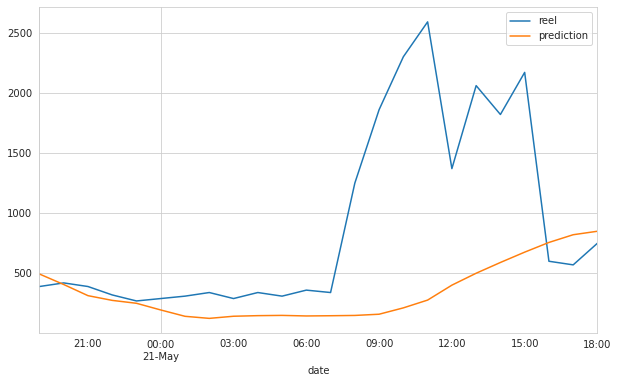

In [ ]:
compare.plot();
# datanın özellikle burası için baya kötü :(((

## Retrain and Forecasting with Full Data

### Scale full data

In [ ]:
df_scaled = df.copy()
# şimdi aynı işlemleri bütün datamız için yapıyoruz.
# datamızın tamamnı scale ediyoruz.

In [ ]:
f_columns = df_scaled.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

df_scaled.loc[:, f_columns] = f_transformer.fit_transform(df_scaled[f_columns])
df_scaled['Appliances'] = target_transformer.fit_transform(df_scaled[['Appliances']])

# aynı yukardaki gibi target ve featureları ayrı ayrı scale yaptık.

In [ ]:
df_scaled # scale edilmiş datam

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,-0.139,10.500,-0.092,0.546,-2.233,0.757,1.643,0.290,-1.038,1.027
2016-01-11 18:00:00,1.889,15.500,-0.146,0.601,-2.181,0.538,0.000,0.221,-1.043,1.022
2016-01-11 19:00:00,1.833,7.500,-0.188,0.619,-2.129,0.708,0.000,0.173,-0.910,1.392
2016-01-11 20:00:00,1.028,10.500,-0.239,0.596,-2.080,0.708,0.000,0.107,-0.790,1.682
2016-01-11 21:00:00,0.667,7.000,-0.225,0.581,-2.051,0.708,0.000,0.072,-0.643,1.445
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,0.639,0.500,2.403,-1.016,-0.030,-0.462,-2.255,1.785,2.024,0.914
2016-05-27 15:00:00,0.222,0.000,2.496,-1.016,-0.043,-0.462,-2.224,1.746,2.019,0.833
2016-05-27 16:00:00,1.194,0.000,2.478,-1.016,-0.072,-0.339,-2.132,1.749,2.043,0.931


Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [ ]:
val_size = 24 # yine son 24 satırı ayırıyoruz.
val = df_scaled.iloc[-val_size:]
full = df_scaled.iloc[:-val_size]
print(len(full), len(val))

3266 24


### reshape to [samples, time_steps, n_features]

In [ ]:
X, y = create_dataset(full, full.Appliances, time_steps)  # create dataset ile yine 24'lük paketler haline getiriyoruz datamızı.
#                  tüm featureler,   appliances sütünları
print(X.shape, y.shape) # datamızı ikiye böldük.

(3242, 24, 10) (3242,)


### Create Final model with full data

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X, y, 
          epochs=15, 
          batch_size=24, 
         # shuffle=False
         )

Epoch 1/15
136/136 [==============================] - 4s 7ms/step - loss: 1.2937
Epoch 2/15
136/136 [==============================] - 1s 6ms/step - loss: 1.1092
Epoch 3/15
136/136 [==============================] - 1s 6ms/step - loss: 1.0639
Epoch 4/15
136/136 [==============================] - 1s 6ms/step - loss: 1.0325
Epoch 5/15
136/136 [==============================] - 1s 6ms/step - loss: 1.0177
Epoch 6/15
136/136 [==============================] - 1s 6ms/step - loss: 0.9749
Epoch 7/15
136/136 [==============================] - 1s 6ms/step - loss: 0.9445
Epoch 8/15
136/136 [==============================] - 1s 6ms/step - loss: 0.9362
Epoch 9/15
136/136 [==============================] - 1s 6ms/step - loss: 0.8827
Epoch 10/15
136/136 [==============================] - 1s 6ms/step - loss: 0.8584
Epoch 11/15
136/136 [==============================] - 1s 6ms/step - loss: 0.8295
Epoch 12/15
136/136 [==============================] - 1s 6ms/step - loss: 0.7910
Epoch 13/15
136/136 [====

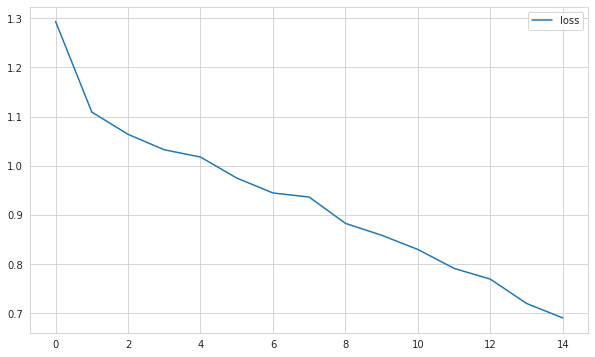

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### forecasting

In [ ]:
df_fake = val.iloc[:,1:]
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-26 19:00:00,0.000,2.011,-1.016,-0.060,-0.170,-0.786,1.134,1.862,0.749
2016-05-26 20:00:00,4.500,1.634,-1.006,-0.048,-0.170,-0.867,1.237,1.838,1.143
2016-05-26 21:00:00,4.000,1.311,-0.842,-0.018,-0.047,-0.092,1.368,1.762,0.990
2016-05-26 22:00:00,6.000,1.111,-0.704,0.000,0.123,2.794,1.444,1.738,0.974
2016-05-26 23:00:00,5.500,0.996,-0.619,0.000,0.000,2.886,1.403,1.695,0.954
2016-05-27 00:00:00,1.000,0.932,-0.513,-0.008,-0.292,2.764,1.355,1.671,0.966
2016-05-27 01:00:00,0.000,0.910,-0.465,-0.028,-0.462,2.693,1.338,1.633,0.959
2016-05-27 02:00:00,0.000,0.875,-0.401,-0.036,-0.585,2.641,1.334,1.605,0.974
2016-05-27 03:00:00,0.000,0.833,-0.336,-0.043,-0.389,2.163,1.375,1.576,0.983


In [ ]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([ 2.66666667,  0.47222222,  0.22222222,  0.11111111,  0.02777778,
       -0.05555556, -0.08333333, -0.22222222, -0.08333333, -0.08333333,
       -0.08333333,  0.        ,  0.80555556,  1.11111111,  3.13888889,
        3.13888889,  4.11111111,  2.02777778,  3.36111111,  0.63888889,
        0.22222222,  1.19444444,  1.94444444,  0.13888889])

### First way : after each prediction, reel value will be use for next prediction¶

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [ ]:
eval_metrics(reel.reshape((1,-1))[0], forecast) # r2 score'umuz yine kötü.

r2_score: -0.16738282375089164 
mae: 1.0040051163588133 
mse: 2.023172065757189 
rmse: 1.422382531444052


In [ ]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[1222.7537 , 1037.7854 ,  593.32715,  523.95435,  475.3571 ,
         376.85553,  264.77893,  231.31152,  221.48375,  254.14377,
         262.72888,  265.3282 ,  296.565  ,  483.80164,  667.03735,
         854.24365,  765.21075,  703.03613,  547.24054,  447.00436,
         490.8775 , 1145.1648 , 1744.7733 , 1673.177  ]], dtype=float32)

In [ ]:
forecast_index = pd.date_range(start = '2016-05-26 19:00:00', periods = periods, freq = 'H')  # start yazan tam validation datamızın başladığı yer.

In [ ]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

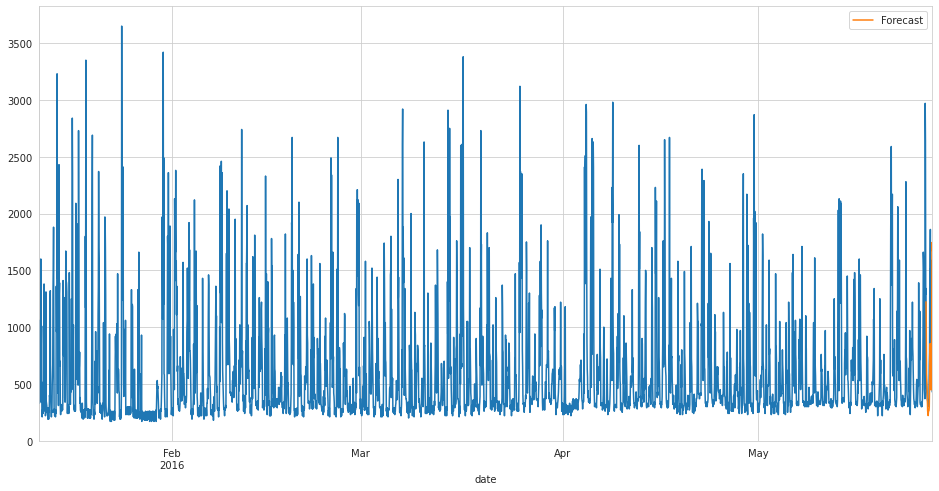

In [ ]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(406699.0, 406770.0)

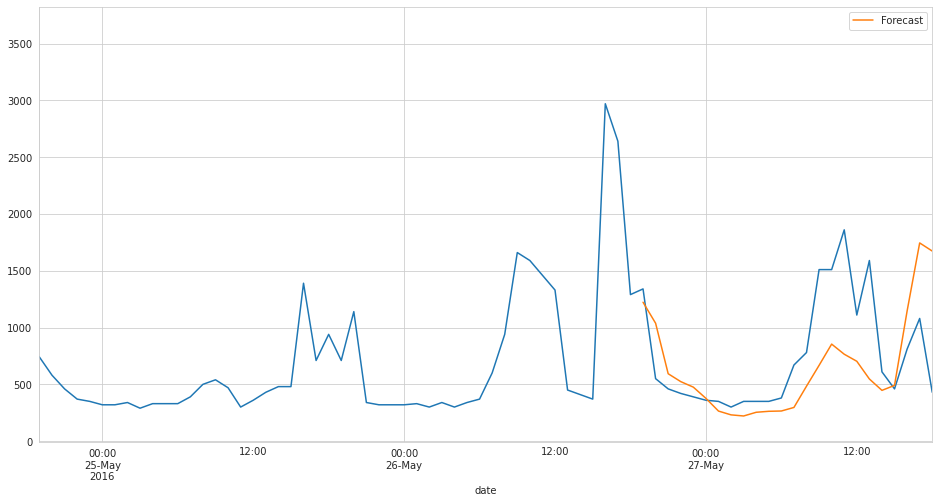

In [ ]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2016-05-24 19:00:00', '2016-05-27 18:00:00')
# gerçek verilerle fena değil en azından girinti ve çıkıntıları yakalayabiliyor

### Second way : after each prediction, result will be use for next prediction

In [ ]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred) # bir öncekinde reel vermiştik ama şimdi current_pred veriyoruz.
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [ ]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: -0.99869012756553 
mae: 1.3645973440294188 
mse: 3.4638971483258167 
rmse: 1.8611547889216031


In [ ]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[1222.7537  ,  992.0307  ,  760.2903  ,  617.12695 ,  526.30005 ,
         432.92432 ,  307.68384 ,  236.88425 ,  211.56985 ,  213.82631 ,
         205.78656 ,  196.65573 ,  211.26497 ,  285.88306 ,  411.40723 ,
         440.26236 ,  310.94305 ,  157.77364 ,   14.973511,  -78.183655,
          67.871   ,  385.9872  ,  905.2022  , 1369.9934  ]],
      dtype=float32)

In [ ]:
forecast_index = pd.date_range(start = '2016-05-26 19:00:00', periods = periods, freq = 'H')

In [ ]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

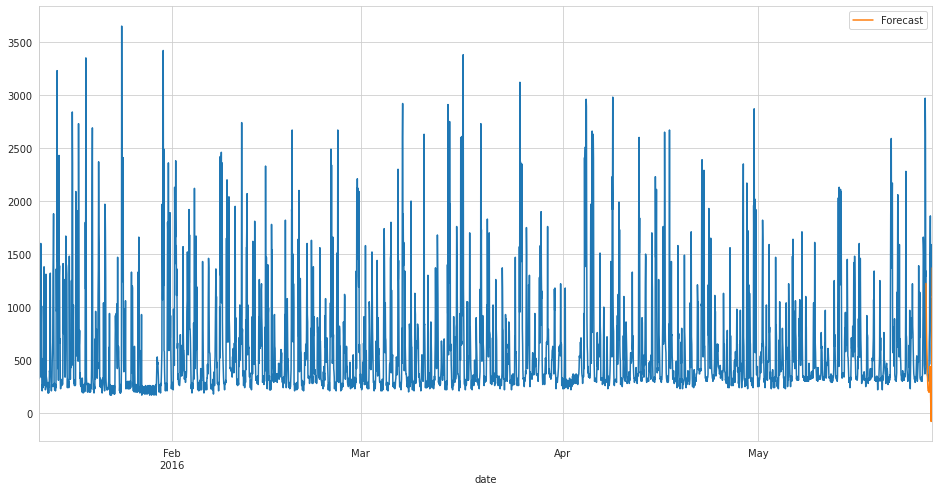

In [ ]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(406699.0, 406770.0)

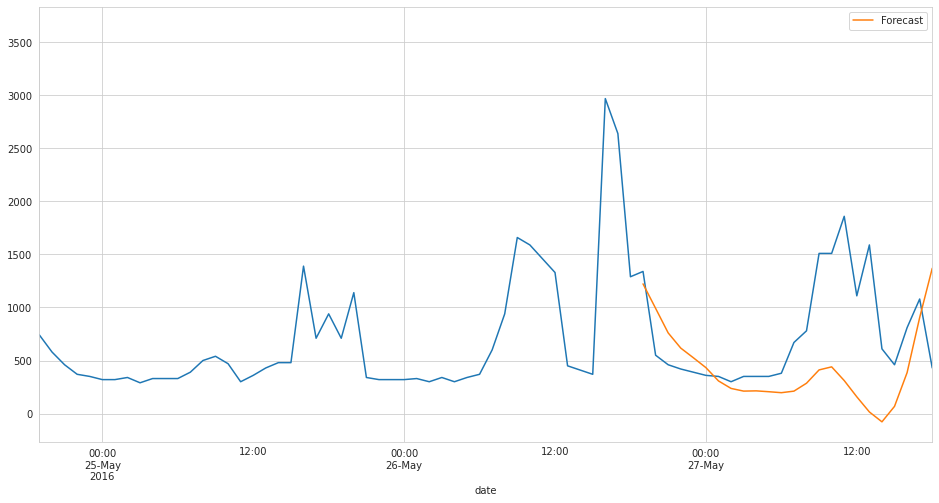

In [ ]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2016-05-24 19:00:00', '2016-05-27 18:00:00')
# burda da nispeten fena değil

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>